<a href="https://colab.research.google.com/github/fightmeat/Machine_Leaning/blob/main/19_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 분석
1. 시계열 데이터란
- 시간에 순차적으로 관측된 값들의 집합
- 예측 모델에서 시간을 변수로 사용하는 특징을 가진 데이터
2. 시계열 데이터 분석이란
- 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법
- 과거의 패턴이 미래에도 지속된다는 안정성을 기본적인 가정으로 구현한다.
3. 시계열 분해법이란
- 시계열 데이터를 추세/순환/계절/불규칙 요소로 분해하는 기법
- 추세(Trend) : 데이터가 장기적으로 증가하거나 감소하는 것이며, 추세가 꼭 선형적일 필요는 없다.
- 순환(Cycle) : 정치, 경제, 사회적인 요인에 의해 변화하는 것
- 계절성(Seasonal) : 특정 시간을 주기로 나타내는 패턴
- 불규칙요소 : 가까운 상황을 분석할 때 효율이 좋다.


# 필수 라이브러리 로딩

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 데이터 셋 로딩

- Data Source : https://www.blockchain.com/explorer/charts/market-price

In [3]:
bitcoin = pd.read_csv('market-price.csv', names=['day', 'price'])

## 탐색적 데이터 분석(EDA)

In [4]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [5]:
# tail()
bitcoin.tail()

,day,price
356,2022/06/21 0:00,20582.29
357,2022/06/22 0:00,20703.51
358,2022/06/23 0:00,19953.71
359,2022/06/24 0:00,21088.30
360,2022/06/25 0:00,21194.68


In [7]:
# 시계열 데이터로 변환
bitcoin['day'] = pd.to_datetime(bitcoin['day'])
bitcoin.set_index('day', inplace=True)
bitcoin.head()

,price
day,
2021-06-30,35847.70
2021-07-01,35047.36
2021-07-02,33536.88
2021-07-03,33856.86
2021-07-04,34688.98


In [8]:
bitcoin.describe()

,price
count,361.000000
mean,43290.492022
std,10049.245982
min,18977.510000
25%,37661.190000
50%,42723.370000
75%,48392.790000
max,67562.170000


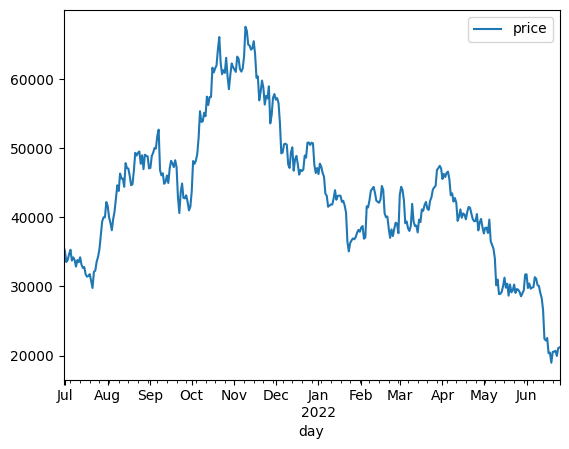

In [9]:
bitcoin.plot()
plt.show()

# 시계열 예측 모델: ARIMA

1. ARIMA(AutoRegressive Intergrated Moving Average) : AR모형과 MA모형을 합친것
  - AR : 자기 상관성 정보에 기반을 둔 모델로 자기 자신의 과거를 정보로 사용한다는 개념
  - MA : 어떤 변수의 평균값이 지속적으로 증가하거나 감소하는 경향에 대한 것으로 이전 항에서의 오차를 이용하여 현재 항의 상태를 추론하는 모형
  - ARMA 모형에 비정상성을 제거하는 과정을 포함한 것이 ARIMA, ARMA 모델에 추세 변동의 경향까지 반형한 것이 ARIMA 모형
2. ARIMA 모형은 시계열 데이터의 정상성(Stationary)를 가정한다.
  - 정상성 : 평균, 분산이 시간에 따라 일정한 성질을 말한다.(즉, 시간의 흐름에 따라 변하지 않음을 의미한다.)
  - 추세나 계절성이 있는 시계열은 정상 시계열이 아니다. 이렇듯 정상성을 나타내지 않는 데이터는 복잡한 패턴을 가지고 있어서 모델링하여 분석하기 어렵기 때문에 정상성을 갖도록 로그변환, 차분등의 전처리 작업을 수행한 후 분석한다.
  - 변동폭이 일정하지 않는 경우 : 로그변환
  - 추세, 계절성이 존재하는 경우 : 차분(differencing)

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# order(AR, d, MA)
# AR : 몇번째 과거까지 학습할것인지
# d : 과거와 실제값의 오차
# MA
model = ARIMA(bitcoin.price.values, order=(2, 1, 2))
model_fit = model.fit()
model_fit

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3145.235
Date:                Thu, 12 Oct 2023   AIC                           6300.470
Time:                        03:49:05   BIC                           6319.900
Sample:                             0   HQIC                          6308.196
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3574      0.009     40.728      0.000       0.340       0.375
ar.L2         -0.9910      0.008   -127.748      0.000      -1.006      -0.976
ma.L1         -0.3760      0.017    -21.935      0.000      -0.410      -0.342
ma.L2          0.9980      0.051     19.735      0.000       0.899       1.097
sigma2      2.358e+06   1.52e-08   1.55e+14      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                26.57
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.47e+28. Standard errors may be unstable.
"""

- order(AR=p, d, MA=q)
- 일반적으로 p + q < 2 , p * q = 0

In [ ]:
# ACF모형
# PACF모형